In [1]:
using CSV, DataFrames, Plots, Statistics

In [2]:
include("..\\src\\setBLP.jl")

Main.setBLP

In [3]:
using Main.setBLP

In [4]:
cps = DataFrame(CSV.File("c:\\data\\Bounds\\cps.csv")) # <-change this to the right directory

## Cleaning zero wage

cps = cps[cps.wage .> 0, :]
first(cps,5)

Row,age,wage,educ
,Int64,Int64,String
1,22,12000,some college but no degree
2,21,3500,some college but no degree
3,49,30000,some college but no degree
4,31,32000,bachelor's degree
5,42,89630,doctorate degree


In [5]:
# Numerical value for education

#1.Creating a dictionary

educ_dict = Dict( 
    "grade 11" => 11, 
    "some college but no degree" => 13, 
    "associate's degree, academic program" => 14,
    "grade 10" => 10, 
    "grades 7 or 8" => 8, 
    "grades 1, 2, 3, or 4" => 4, 
    "associate's degree, occupational/vocational program" => 14, 
    "high school diploma or equivalent" => 12, 
    "grade 9" => 9, 
    "none or preschool" => 0, 
    "doctorate degree" => 21,
    "bachelor's degree" => 16, 
    "master's degree" => 14, 
    "grades 5 or 6" => 6, 
    "professional school degree" => 14, 
    "12th grade, no diploma" => 12
    );

In [6]:
#2. transforming cps.educ
f(x) = educ_dict[x]
cps.educ_num = f.(cps.educ)

#3. log of wage
cps.log_wage = log.(cps.wage)
first(cps,3)

Row,age,wage,educ,educ_num,log_wage
,Int64,Int64,String,Int64,Float64
1,22,12000,some college but no degree,13,9.39266
2,21,3500,some college but no degree,13,8.16052
3,49,30000,some college but no degree,13,10.309


In [7]:
Nobs, c = size(cps)
print("The original data contains ", Nobs, " observations and ",c, " columns.")

The original data contains 22715 observations and 5 columns.

In [8]:
wage_quantiles = quantile(cps[!,:wage],[0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], sorted=false);
#wage_quantiles[1] +=-1
wage_quantiles[end] +=1

362303.0

In [9]:
lower(x) = wage_quantiles[sum(wage_quantiles .<=x)]
upper(x) = wage_quantiles[sum(wage_quantiles .<=x)+1]

cps.wage_lower = lower.(cps.wage)
cps.wage_upper = upper.(cps.wage)

cps.logwage_lower = log.(cps.wage_lower)
cps.logwage_upper = log.(cps.wage_upper)

first(cps,3)

Row,age,wage,educ,educ_num,log_wage,wage_lower,wage_upper,logwage_lower,logwage_upper
,Int64,Int64,String,Int64,Float64,Float64,Float64,Float64,Float64
1,22,12000,some college but no degree,13,9.39266,9000.0,15000.0,9.10498,9.61581
2,21,3500,some college but no degree,13,8.16052,1.0,9000.0,0.0,9.10498
3,49,30000,some college but no degree,13,10.309,30000.0,36000.0,10.309,10.4913


In [10]:
N = 200;
df = cps[1:N,:];

In [11]:
describe(df);

In [12]:
x = df[:,:age];
yl = df[:,:logwage_lower];
yu = df[:,:logwage_upper];
xyl = x.*yl;
xyu = x.*yu;

In [13]:
vl = Vertex([yl[1],xyl[1]])
vu = Vertex([yu[1],xyu[1]])
P = Polygon([vl,vu])
sortPolygon!(P)

for j = 2:N
    vl = Vertex([yl[j],xyl[j]])
    vu = Vertex([yu[j],xyu[j]])
    P0 = Polygon([vl,vu])
    sortPolygon!(P0)
    P +=P0
    sortPolygon!(P)
end

In [14]:
#avgP = lambdaPolygon(P,1/N);

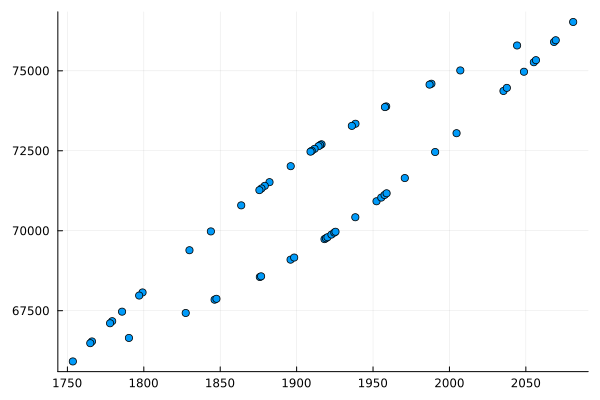

In [15]:
scatterPolygon(P)

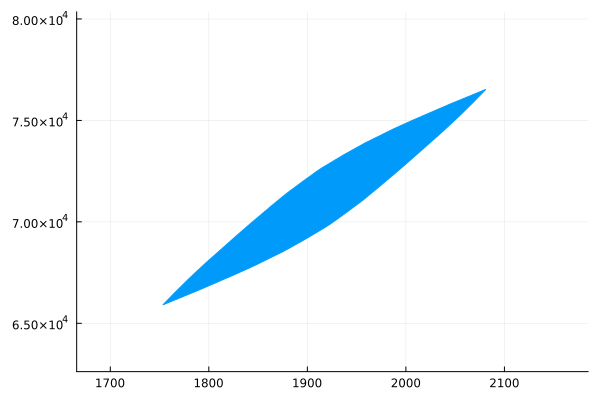

In [16]:
plotPolygon(P)

In [17]:
length(P.vertices)

60

In [18]:
for (i,v) in enumerate(P.vertices)
    println(i,": ",v)
end

1: Vertex(Real[1753.5600766412601, 65914.07599464101])
2: Vertex(Real[1790.2676781389853, 66648.22802459553])
3: Vertex(Real[1827.421566739339, 67428.45968520296])
4: Vertex(Real[1846.3246736325357, 67844.32803685329])
5: Vertex(Real[1847.5286464368617, 67872.01941135278])
6: Vertex(Real[1875.9297757744857, 68553.64651545575])
7: Vertex(Real[1876.7425052969054, 68574.77748303866])
8: Vertex(Real[1896.0323851651979, 69095.60423948256])
9: Vertex(Real[1898.3961553415338, 69161.78980441997])
10: Vertex(Real[1918.2475739966656, 69737.4809454188])
11: Vertex(Real[1919.1609810868388, 69764.883158124])
12: Vertex(Real[1920.2000792479741, 69797.0952011192])
13: Vertex(Real[1922.7841093339234, 69879.78416386958])
14: Vertex(Real[1924.6469125215297, 69941.25666906059])
15: Vertex(Real[1925.4373512985305, 69968.13158747862])
16: Vertex(Real[1938.40608365454, 70422.03721993897])
17: Vertex(Real[1952.278341522553, 70921.43850318743])
18: Vertex(Real[1955.3935277875735, 71036.70039499317])
19: Verte

In [19]:
v00 = Vertex([0,0])
v11 = Vertex([1,1])
v_11 = Vertex([-1,1])
v_21 = Vertex([-2,1])
v_005 = Vertex([0,0.5])
v_050 = Vertex([0,-0.5])

Vertex(Real[0.0, -0.5])

In [20]:
P = Polygon([v00,v11, v_11])

Polygon(Vertex[Vertex(Real[0, 0]), Vertex(Real[1, 1]), Vertex(Real[-1, 1])], false)

In [21]:
Q = Polygon([v_005,v_21,v_050])

Polygon(Vertex[Vertex(Real[0.0, 0.5]), Vertex(Real[-2, 1]), Vertex(Real[0.0, -0.5])], false)

In [22]:
P + Q

Polygon(Vertex[Vertex(Real[0.0, -0.5]), Vertex(Real[1.0, 0.5]), Vertex(Real[1.0, 1.5]), Vertex(Real[-1, 2]), Vertex(Real[-3, 2]), Vertex(Real[-2, 1])], true)

In [23]:
Q + P

Polygon(Vertex[Vertex(Real[0.0, -0.5]), Vertex(Real[1.0, 0.5]), Vertex(Real[1.0, 1.5]), Vertex(Real[-1, 2]), Vertex(Real[-3, 2]), Vertex(Real[-2, 1])], true)